In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataset
data=pd.read_excel('Dataset.xlsx')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [ ]:
#Project Introduction: the dataset has information about the housing sector of California (western coast). We will analyse how 
#different features affects each other.

In [ ]:
#checking datatypes
#Continuous numerical data columns: [longitude,latitude, housing_median_age, median_income, median_house_value
#Dicrete numerical data columns:[total_rooms, population, households]
#Ordinal categorical data columns:[ocean_proximity]
#Nominal categorical data columns:[None]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
#checking shape to get total no of rows and columns
data.shape

(20640, 11)

In [ ]:
#checking duplicates
data.duplicated().sum()

0

In [ ]:
#ques1:#average median income 
data['median_income'].mean()

3.8706710029070246

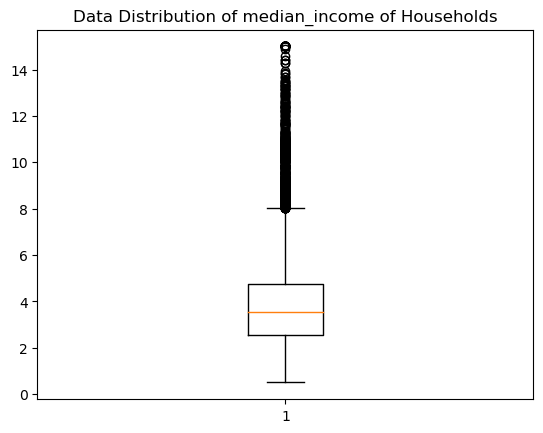

In [ ]:
#ques1:#appropriate plot to see distribution of data of median income
#plt.hist(data['median_income'])
#plt.title('Data Distribution of median_income of Households' )
#plt.ylabel('Income in US Dollars')
#plt.grid()
#obersevation: there is high income disparity. Income of some households is more than US $7000 and some households 
#earn less than US $1000. Median income is around US $4000.
#Data is slightly positively skewed as median is closer to lower whisker.
plt.boxplot(data['median_income'])
plt.title('Data Distribution of median_income of Households' )
plt.show()


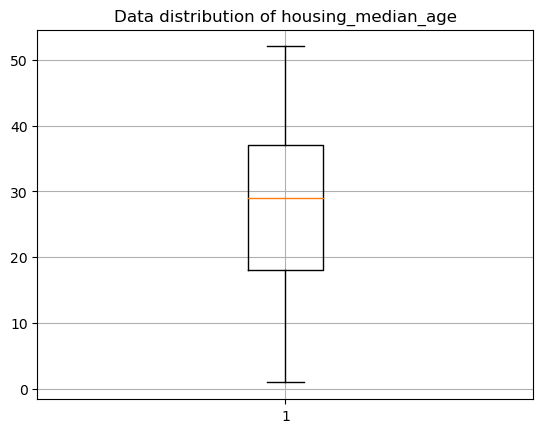

In [ ]:
#ques2:appropriate plot to see the distribution of housing_median_age and explain your observations.
#plt.hist(data['housing_median_age'])
#plt.title('Data distribution of housing_median_age')
#plt.xlabel('housing_median_age in Years')
#plt.show()
plt.boxplot(data['housing_median_age'])
plt.title('Data distribution of housing_median_age')
plt.grid()
plt.show()
#observation: the housing median age is near to 30. the data is slightly negatively skewed. Min value is close 0 and 
#max value is around 55.

In [ ]:
data['housing_median_age'].mean()

28.639486434108527

Text(0.5, 1.0, 'Relationship between median_income and median_house_value')

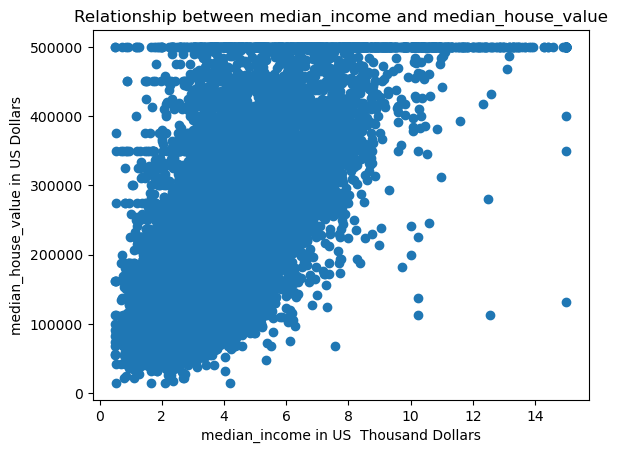

In [ ]:
#ques3:with help of visualization show how median income and median house values are related
plt.scatter(data['median_income'],data['median_house_value'])
plt.xlabel('median_income in US  Thousand Dollars')
plt.ylabel('median_house_value in US Dollars')
plt.title('Relationship between median_income and median_house_value' )
#observation: there is a linear relationship between median_income and median_house_value. As the income of people rises so the 
#living standard. But there are few outliers as well.

In [ ]:
#ques4: create a dataset by deleting the corresponding examples from the dataset for which total_bedrooms are not available
#checking for null values. total_bedrooms column has some null values.
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#Capturing data in new variable after removing null values
no_dups_data=data.dropna()
no_dups_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
#ques5: creata a dataset by filling the missing values with the mean value of the total_bedrooms in the original data
data.fillna(data['total_bedrooms'].mean(), inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
#ques6: Write a programming construct (create a user defined function) 
#to calculate the median value of the data set wherever required.
def get_median(l):
    l.sort()
    if len(l)%2 !=0:
        median=l[int(len(l)/2)]
    else:
        median=l[(int(len(l)/2)-1)]+l[int(len(l)/2)]
        median=median/2
    return median

l=[]
size=int(input('Enter the number of elements you want put: ')) 
for i in range(size):
                  val=int(input('Enter the values: '))
                  l.append(val)
                
get_median(l)

Enter the number of elements you want put: 3
Enter the values: 45
Enter the values: 45
Enter the values: 45


45

In [ ]:
list=[99,45,55,60,70]
b=np.array(list)
b
np.median(b)

60.0

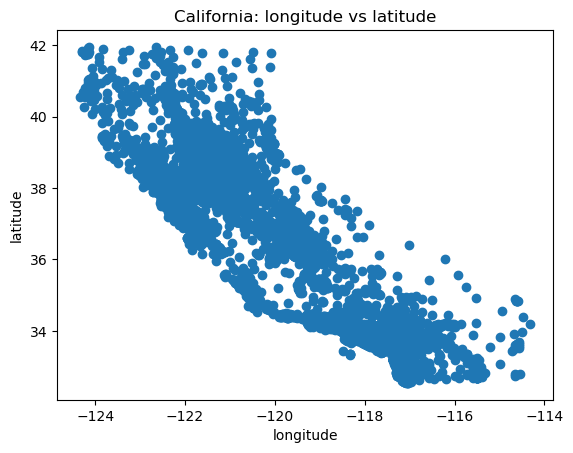

In [ ]:
#ques7: Plot latitude versus longitude and explain your observations
plt.scatter(data['longitude'], data['latitude'])
plt.title('California: longitude vs latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()
#observation: People tend to prefer to live near ocean proximity. This also gives a hint about the income levels of people as 
#houses near ocean proximity are expensive. Population density seems high. 

In [ ]:
#ques8: Create a data set for which the ocean_proximity is ‘Near ocean’
mask=data['ocean_proximity']=='NEAR OCEAN'
near_ocean=data[mask]
near_ocean
#NEAR OCEAN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


In [ ]:
#ques9: Find the mean and median of the median income for the data set created in question 8.
print(near_ocean['median_income'].mean())
print(near_ocean['median_income'].median())

4.005784800601957
3.64705


In [ ]:
#ques 10: Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, 
#it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, 
#otherwise it should be considered large.
data['total_bedroom_size']=data['total_bedrooms'].apply( lambda x: 'small' if x<=10 else 'medium' if x<1000 else 'large')
data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
9308,-122.54,37.98,52,1758,316.0,607,264,5.5083,371900,NEAR BAY,medium
18327,-122.15,37.46,52,1803,257.0,683,259,10.9508,500001,NEAR BAY,medium
3091,-118.45,35.62,18,2304,527.0,782,390,1.4141,75800,INLAND,medium
2418,-119.46,36.60,18,1404,226.0,754,229,3.9844,118100,INLAND,medium
8234,-118.20,33.77,42,517,233.0,995,212,2.2250,106300,NEAR OCEAN,medium
